In [1]:
#Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the dataset
dataset = pd.read_csv("games.csv")

In [3]:
#Print the names of the columns
print(dataset.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [4]:
#Print the shape
print(dataset.shape)

(81312, 20)


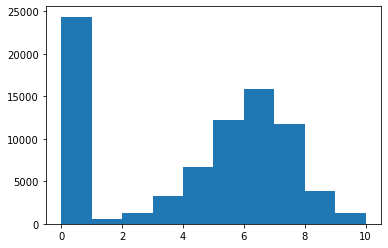

In [5]:
#First let us plot the histogram
plt.hist(dataset['average_rating'])
plt.show()

There are so many games which are not rated at all. We are performing some EDA on this now.

In [6]:
#Print the first column of the game with average rating equal to 0
print(dataset[dataset['average_rating'] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


We observe that Looney Loo has no user ratings at all. Thus, we can assume having several of such missing values from the dataset that causes them to be 0.

In [7]:
#Print the first column of the game with average rating greater than 0
print(dataset[dataset['average_rating'] > 0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


We observe that Twilight Struggle has more than 20,000 user ratings at all. We require such rows for correct prediction of the outputs. Thus, we must remove all the empty or NA columns of users_rated from our dataset.

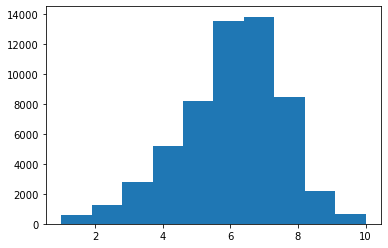

In [8]:
#Modify dataset by removing empty users
dataset = dataset[dataset['users_rated'] > 0]

#Modify dataset by dropping empty rows
dataset = dataset.dropna(axis = 0)

#Checking histogram again
plt.hist(dataset['average_rating'])
plt.show()

Okay, so we have successfully remove all the null users_rated values from the dataset. Now let's check the columns.

In [9]:
print(dataset.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


We understand that many of these columns are redundant as they do not contribute to the overall accuracy of the model.

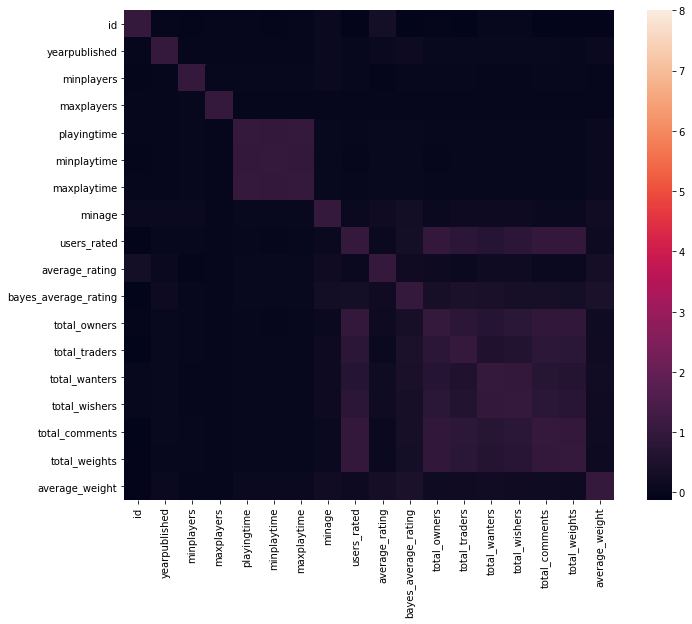

In [10]:
#Plot correlation using a heatmap
import seaborn as sns
corrmat = dataset.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 8, square = True)
plt.show()

In this heatmap we can notice how bayes_average_rating, type, name and id do not contribute to the strength of each of the elements in the model. Also it can be inferred that while playingtime, minplaytime and maxplaytime aren't good predictors individually, they contribute to a great deal of correlation within themselves. We tend to discard the afrementioned four values from the dataset.

In [11]:
#Create inputs and output variables
inputs = dataset.drop(['bayes_average_rating', 'average_rating', 'type', 'name', 'id'], axis = 1)
output = dataset['average_rating']

In [12]:
#Perform training and testing splits with test size as 20% of the datset. We tried checking the size using the .shape attribute
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(45515, 15)
(11379, 15)


In [13]:
#Create LinearRegression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Create an instance of the model and fit it with training values
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [14]:
#Calculate y_pred
y_pred = LR.predict(X_test)

#Calculate mean_square_error to check the skewness of the points from the actual output
mean_squared_error(y_pred, y_test)

2.0847610712545177

The error is nearly 2.07. We believe this can be further reduced using an ensemble method such as a Random Forest Regressor. It is powerful and accurate and has good performance on many problems, including non linear.

In [15]:
#Create RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)
RF.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [16]:
#Calculate y_pred
y_pred = RF.predict(X_test)

#Calculate mean_square_error to check the skewness of the points from the actual output
mean_squared_error(y_pred, y_test)

1.4599222099037266

The error is much lesser than the previous one. Thus, RandomForestRegressor is more reliable in providing accurate results

In [17]:
#Checking the first row of X_test
X_test.iloc[0]

yearpublished     1992.0
minplayers           1.0
maxplayers           2.0
playingtime         60.0
minplaytime         60.0
maxplaytime         60.0
minage              12.0
users_rated          8.0
total_owners        38.0
total_traders        5.0
total_wanters        1.0
total_wishers        1.0
total_comments       8.0
total_weights        2.0
average_weight       3.0
Name: 32356, dtype: float64

In [18]:
#Compare the predicted values of Linear Regressor and Rndom Forest Regressor respectively
np.concatenate((LR.predict(X_test.iloc[0].values.reshape(1,-1)), RF.predict(X_test.iloc[0].values.reshape(1,-1))))

array([6.83440703, 5.89491255])

In [19]:
y_test.iloc[0]

5.5625

The prediction deduced by Random Forest Regressor is almost closer to the actual prediction. Now, let us try to apply Support Vector and Decision Tree Regressor to see which amongst these four perform better.

In [20]:
#Create LinearRegression model
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(min_samples_leaf = 10, random_state = 1)
DT.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=10, random_state=1)

In [21]:
#Calculate y_pred
y_pred = DT.predict(X_test)

#Calculate mean_square_error to check the skewness of the points from the actual output
mean_squared_error(y_pred, y_test)

1.809822164729183

In [22]:
#Create SVR model
from sklearn.svm import SVR
SV = SVR(kernel = 'rbf', gamma='scale')
SV.fit(X_train, y_train)

SVR()

In [23]:
#Calculate y_pred
y_pred = SV.predict(X_test)

#Calculate mean_square_error to check the skewness of the points from the actual output
mean_squared_error(y_pred, y_test)

2.0558644751001447

In [24]:
#Checking the first row of X_test
X_test.iloc[0]

yearpublished     1992.0
minplayers           1.0
maxplayers           2.0
playingtime         60.0
minplaytime         60.0
maxplaytime         60.0
minage              12.0
users_rated          8.0
total_owners        38.0
total_traders        5.0
total_wanters        1.0
total_wishers        1.0
total_comments       8.0
total_weights        2.0
average_weight       3.0
Name: 32356, dtype: float64

In [25]:
#Compare the predicted values of Linear Regressor and Random Forest Regressor respectively
np.concatenate((SV.predict(X_test.iloc[0].values.reshape(1,-1)), DT.predict(X_test.iloc[0].values.reshape(1,-1))))

array([5.96169032, 5.36229462])

In [26]:
y_test.iloc[0]

5.5625

The prediction deduced by Support Vector and Decision Tree Regressor is not as close to zero as Random Forest Regressor and Decision Tree Regressor is. We discard these classifiers and now we compare DT and RF classifiers

In [35]:
#Compare the predicted values of Decision Tree Regressor and Random Forest Regressor respectively, along with the actual values
data = []
for i in range(0, 21):
    data.append([DT.predict(X_test.iloc[i].values.reshape(1,-1))[0], RF.predict(X_test.iloc[i].values.reshape(1,-1))[0], y_test.iloc[i]])
df = pd.DataFrame(data, columns = ['Decision Tree Regressor ratings', 'Random Forest Regressor ratings', 'Actual Ratings'])
print(df)

    Decision Tree Regressor ratings  Random Forest Regressor ratings  \
0                          5.362295                         5.894913   
1                          5.919231                         5.712311   
2                          8.789651                         9.524077   
3                          6.286550                         6.135397   
4                          7.853132                         6.915215   
5                          5.670755                         5.782902   
6                          7.377669                         7.406292   
7                          8.042729                         7.177712   
8                          4.591213                         4.984203   
9                          5.375000                         5.165836   
10                         6.370615                         6.390635   
11                         5.716311                         6.571391   
12                         6.794397                         6.02

Thus, we can conclude from this prediction that Random Forest Regressor is the only best predictor that can provide us the most reliable outputs for the Board Game Review Prediction.